## Basit Doğrusal Regrasyon

### Model

In [3]:
#http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
import pandas as pd
df=pd.read_csv("Advertising.csv")
df=df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
import seaborn as sns
sns.jointplot(x="TV",y="sales",data=df,kind="reg")

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
X=df[["TV"]]

In [8]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [9]:
y=df[["sales"]]

In [10]:
reg = LinearRegression()

In [11]:
model =reg.fit(X,y)

In [12]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
str(model)

'LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)'

In [14]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [15]:
model.intercept_ #bo

array([7.03259355])

In [16]:
model.coef_ #b1

array([[0.04753664]])

In [17]:
#rkare
model.score(X,y)

0.611875050850071

## Tahmin

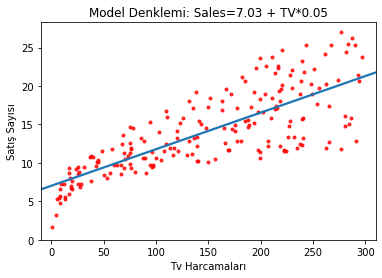

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(df["TV"],df["sales"],ci=None,scatter_kws={'color':'r','s':9})
g.set_title("Model Denklemi: Sales=7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("Tv Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

Sales = 7.03 + 0.05*TV

In [19]:
7.03+0.05*165

15.280000000000001

In [20]:
model.intercept_+model.coef_*165

array([[14.87613922]])

In [21]:
model.predict([[165]])

array([[14.87613922]])

In [22]:
yeni_veri=[[5],[15],[30]]

In [23]:
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

### MSE : Hata Kareler Ortalaması
### RMSE : Hata Kareler Ortalamasının Karekökü

In [24]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [25]:
model.predict(X)[0:6]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [26]:
gercek_y=y[0:10]

In [27]:
tahmin_edilen_y=pd.DataFrame(model.predict(X)[0:10])

In [28]:
hatalar= pd.concat([gercek_y,tahmin_edilen_y],axis=1)

In [29]:
hatalar.columns=["gercek_y","tahmin_edilen_y"]

In [30]:
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [31]:
hatalar["hata"]=hatalar["gercek_y"]-hatalar["tahmin_edilen_y"]

In [32]:
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [33]:
hatalar["hata_kareler"]=hatalar["hata"]**2

In [34]:
hatalar

,gercek_y,tahmin_edilen_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [35]:
import numpy as np
np.mean(hatalar["hata_kareler"])

9.290350329638102

## Çoklu Doğrusal Regresyon

Model

In [36]:
#http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
import pandas as pd
df=pd.read_csv("Advertising.csv")
df=df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [37]:
X=df.drop('sales',axis=1)

In [38]:
y=df[["sales"]]

In [39]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [40]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [41]:
# Statsmodels ile model kurmak

In [42]:
import statsmodels.api as sm

In [43]:
lm=sm.OLS(y,X)

In [44]:
model=lm.fit()

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):                   2.43e-171
Time:                        14:36:02   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
##scikit learn ile model kurmak

In [47]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [48]:
model=lm.fit(X,y)

In [49]:
model.intercept_

array([2.93888937])

In [50]:
model.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

### Tahmin
#### Sales = 2.94+TV*0.04+radio*0.19-newspaper*0.0001

30 birim TV, 10 birim radio, 40 birim gazete

In [51]:
2.94+30*0.04+10*0.19-40*0.001

5.999999999999999

In [52]:
yeni_veri=[[30],[10],[40]]

In [53]:
import pandas as pd
yeni_veri=pd.DataFrame(yeni_veri).T

In [54]:
yeni_veri

,0,1,2
0,30,10,40


In [55]:
model.predict(yeni_veri)

array([[6.15562918]])

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [58]:
model.predict(X)[0:10]

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872]])

In [59]:
MSE=mean_squared_error(y,model.predict(X))
MSE

2.7841263145109365

In [60]:
import numpy as np
RMSE=np.sqrt(MSE)
RMSE

1.66857014072257

## Model Tuning ( Model Doğrulama)

In [61]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [62]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [63]:
#sinama seti

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1) # 80 lik train 20lik test

In [66]:
X_train.head()

,TV,radio,newspaper
108,13.1,0.4,25.6
107,90.4,0.3,23.2
189,18.7,12.1,23.4
14,204.1,32.9,46.0
56,7.3,28.1,41.4


In [67]:
y_train.head()

,sales
108,5.3
107,8.7
189,6.7
14,19.0
56,5.5


In [68]:
X_test.head()

,TV,radio,newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0


In [69]:
y_test.head()

,sales
58,23.8
40,16.6
34,9.5
102,14.8
184,17.6


In [70]:
lm=LinearRegression()
model=lm.fit(X_train,y_train)

In [71]:
#eğitim hatası
np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

1.7369025901470923

In [72]:
#test hatası
np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

1.4113417558581578

In [73]:
#k-katlı cv

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
cross_val_score(model,X_train,y_train,cv=10,scoring="neg_mean_squared_error")

array([-1.62375953, -3.81875608, -3.43828142, -2.27748673, -7.25325414,
       -1.88303708, -2.80517715, -3.68594486, -1.12810834, -3.96330989])

In [76]:
#cv mse
np.mean(-cross_val_score(model,X_train,y_train,cv=10,scoring="neg_mean_squared_error"))

3.1877115209443563

In [77]:
#cv rmse
np.sqrt(np.mean(-cross_val_score(model,X_train,y_train,cv=10,scoring="neg_mean_squared_error")))

1.7854163438661461

In [78]:
#cv rmse #çapraz doğrulama işleminde test seti dışarda kalmalı (kendi içinde 10 parçaya bölüp deniyor)
np.sqrt(np.mean(-cross_val_score(model,X,y,cv=10,scoring="neg_mean_squared_error")))

1.7492763126843383

## Ridge Regresyon

### Gerekli kütüphaneler

In [79]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

### Veri Seti

In [80]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[['League','Division','NewLeague']])

y=df["Salary"]
X_=df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X=pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.25,
                                                 random_state=42)

In [81]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [82]:
df.shape

(263, 20)

In [83]:
ridge_model = Ridge(alpha=5).fit(X_train,y_train)

In [84]:
ridge_model

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [85]:
ridge_model.coef_

array([ -1.81040449,   8.87872786,   7.12487047,  -3.31713488,
        -2.01162162,   5.40691525,   7.25828404,  -0.13033385,
        -0.25425913,  -0.71109275,   1.81452   ,   0.77083457,
        -0.6768975 ,   0.26211894,   0.2646614 ,  -0.36947934,
        76.19519054, -90.15523668, -16.00453535])

In [86]:
ridge_model.intercept_

-3.425196868720491

In [87]:
lambdalar=10**np.linspace(10,-2,100)*0.5

In [88]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [89]:
ridge_model=Ridge()
katsayilar=[]

for i in lambdalar:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train,y_train)
    katsayilar.append(ridge_model.coef_)

In [90]:
katsayilar

[array([ 1.08705828e-03,  3.59972026e-04,  5.52181027e-05,  1.92813177e-04,
         1.96696069e-04,  1.59478501e-04,  2.78199599e-05,  1.78978518e-02,
         5.28448603e-03,  6.33684784e-04,  2.78574434e-03,  2.70578331e-03,
         1.95710128e-03,  1.87423190e-03,  1.54040667e-04,  2.97933111e-06,
         2.39984989e-07, -1.51804510e-06,  3.31089982e-07]),
 array([ 1.41677983e-03,  4.69820454e-04,  7.18242293e-05,  2.52218183e-04,
         2.55763476e-04,  2.07728851e-04,  3.41731833e-05,  2.22675231e-02,
         6.58971645e-03,  7.96723486e-04,  3.48283639e-03,  3.38849662e-03,
         2.44474193e-03,  2.46055074e-03,  2.00411447e-04,  4.05879985e-06,
         3.06791363e-07, -2.00697735e-06,  4.22750663e-07]),
 array([ 1.84180994e-03,  6.11797854e-04,  9.31516430e-05,  3.29313865e-04,
         3.31574150e-04,  2.69862282e-04,  4.11993224e-05,  2.73092348e-02,
         8.10613246e-03,  9.90615632e-04,  4.29892819e-03,  4.19154557e-03,
         3.01420413e-03,  3.22598807e-03, 

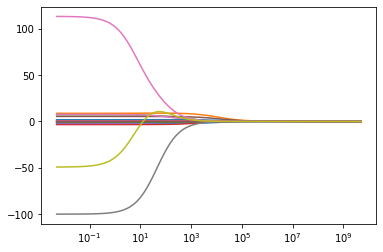

In [91]:
ax=plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale("log")

### Tahmin

In [97]:
ridge_model =Ridge().fit(X_train,y_train)
#model kurduk, parametre optimasyonu yapmadan train seti üzerine kurduk

In [98]:
y_pred = ridge_model.predict(X_train)
#train seti icin bir tahmin etme islemi yaptık,y bağımlı değişkenlerini tahmin ettik.X bağımsız değişkenlerini kullanarak

In [99]:
y_pred[0:10] #tahmin edilen bağımlı değişkenler

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [100]:
y_train[0:10] # gerçek bağımlı değişkneler

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [102]:
#train hatası #kıyaslama
RMSE = np.sqrt(mean_squared_error(y_train,y_pred))
RMSE #dogrulanmamis

289.34470696006565

In [105]:
#daha dogru hata-hata dusuk olmasi her zaman dogru oldu anlamina gelmez
np.sqrt(np.mean(-cross_val_score(ridge_model,X_train,y_train,cv=10,scoring="neg_mean_squared_error")))

351.3931585606368

In [106]:
#test hatası #test setinde başarımızı denedik
y_pred=ridge_model.predict(X_test)

In [107]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE
#karsilastirma tahmin ile gerçeği

356.808290573023

 ### Model Tuning

#### Neden Model Tuning?

In [114]:
ridge_model= Ridge(1).fit(X_train,y_train) #lambda değeri değişrilebiliyor
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.808290573023

In [115]:
np.random.randint(0,1000,100)

array([912, 154, 969, 851, 172, 112, 181, 125, 339, 743, 910, 113, 835,
       429, 160, 552,  73, 307, 989, 170, 246, 391, 150, 286, 203, 622,
       816, 661, 226, 887, 935, 765, 648, 289, 682, 747, 529, 261, 347,
       785, 255, 347,   5, 349, 519, 186, 797, 171, 261, 521, 302, 122,
        47, 291, 103, 723, 607,  40, 297,  12, 126, 535,  14, 784, 726,
       633, 217, 823, 180, 361, 429, 494, 645, 752, 135,  18, 905, 507,
       207,  86, 378, 652, 255, 276, 427, 473, 969, 542, 623,  18,  21,
        99, 856, 471, 598, 228, 286, 319, 952, 217])

In [116]:
lambdalar1 = np.random.randint(0,1000,100)

In [117]:
lambdalar2= 10**np.linspace(10,-2,100)*0.5

In [120]:
ridgecv = RidgeCV(alphas = lambdalar2,scoring="neg_mean_squared_error",cv=10,normalize=True)
ridgecv.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [124]:
ridgecv=RidgeCV(alphas = lambdalar2,scoring="neg_mean_squared_error",cv=10,normalize=True)
ridgecv.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [125]:
ridgecv.alpha_

0.7599555414764666

In [126]:
#final modeli

In [128]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train,y_train)

In [131]:
#final modeli
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.85830472715105

### Lasso Regresyon

#### Gerekli kütüphaneler

In [133]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,LassoCV

### Veri Seti

In [137]:
df = pd.read_csv("Hitters.csv")

df = df.dropna()

dms = pd.get_dummies(df[['League','Division','NewLeague']])

y = df["Salary"]

X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')

X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [138]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [139]:
df.shape

(263, 20)

In [140]:
lasso_model = Lasso().fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.39985041, tolerance: 3898.686956380658
  positive)


In [141]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [142]:
lasso_model.intercept_

-5.587450677336392

In [143]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [144]:
#farklı lambda degerlerine karsilik katsayilar

In [157]:
lasso = Lasso()
coefs = []
alphas = 10**np.linspace(10,-2,100)*0.5
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741405606, tolerance: 3898.686956380658
  positive)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.1476793810725, tolerance: 3898.686956380658
  positive)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.7561375163496, tolerance: 3898.686956380658
  positive)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5357.774935699999, tolerance: 3898.68695638065

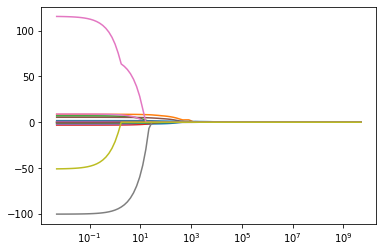

In [158]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")